#### Exploratory Data Analysis 

Tesla Stock Features: In this notebook, we explore the cleaned and feature‑engineered Tesla dataset.

 Notebook Header & Imports

In [1]:
#loading our libraries and set up plotting so that visuals are clear and consistent.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#Set common plotting defaults

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

Loading the Data & Basic Overview

In [2]:
df = pd.read_csv('../data/processed/tsla_features.csv', 
                parse_dates=['Date'], index_col='Date')


In [3]:
# Quick look at shape and columns
print("Data shape:", df.shape)
print("Columns:", list(df.columns))


Data shape: (2253, 19)
Columns: ['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'return_1', 'return_5', 'return_21', 'ma_5', 'ma_10', 'ma_20', 'vol_10', 'rsi', 'vol_ma_20', 'vol_ratio_20', 'day_of_week', 'month', 'quarter']


In [4]:
# Displaying the first five rows to confirm that our features file loaded correctly, check dimensions, and verify column names.
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,return_1,return_5,return_21,ma_5,ma_10,ma_20,vol_10,rsi,vol_ma_20,vol_ratio_20,day_of_week,month,quarter
Date,,,,,,,,,,,,,,,,,,,
2015-02-03,21,14.214667,14.691333,14.084667,14.557333,72393000,0.035176,0.060103,-0.004332,13.832933,13.663200,13.550033,0.022787,61.883094,66785700.0,1.083960,1,2,1
2015-02-04,22,14.552667,14.765333,14.453333,14.570000,49581000,0.000870,0.096203,0.040268,14.088667,13.809733,13.574267,0.022733,76.937485,64568325.0,0.767884,2,2,1
2015-02-05,23,14.658667,15.032000,14.642667,14.732667,52843500,0.011165,0.076949,0.045958,14.299200,13.938867,13.607733,0.022139,79.342992,64984200.0,0.813175,3,2,1
2015-02-06,24,14.800000,14.893333,14.433333,14.490667,48658500,-0.016426,0.067584,0.030386,14.482667,14.046000,13.630200,0.023417,73.333332,64835250.0,0.750495,4,2,1
2015-02-09,25,14.358667,14.528667,14.132667,14.498667,52086000,0.000552,0.031004,0.032571,14.569867,14.118867,13.666267,0.022594,75.034291,63938325.0,0.814629,0,2,1


Summary Statistics

In [5]:
#Summary stats for numerical features
#Understanding central tendency, spread, and detect extreme values.
"""We should look for:
  - Returns with huge min/max (spikes?)
  - Volatility scales
  - RSI bounds (should be between 0 and 100) """
  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2253.0,1.147000e+03,6.505294e+02,2.100000e+01,5.840000e+02,1.147000e+03,1.710000e+03,2.273000e+03
Open,2253.0,1.043323e+02,1.113115e+02,9.488000e+00,1.679467e+01,2.332533e+01,2.156667e+02,4.114700e+02
High,2253.0,1.066291e+02,1.137850e+02,1.033133e+01,1.700467e+01,2.366533e+01,2.209700e+02,4.144967e+02
Low,2253.0,1.018541e+02,1.085711e+02,9.403333e+00,1.656667e+01,2.293600e+01,2.100000e+02,4.056667e+02
Close,2253.0,1.042996e+02,1.112071e+02,9.578000e+00,1.679067e+01,2.330267e+01,2.157367e+02,4.099700e+02
Volume,2253.0,1.146452e+08,7.706191e+07,1.062000e+07,6.658290e+07,9.424950e+07,1.341684e+08,9.140820e+08
return_1,2253.0,1.852912e-03,3.558430e-02,-2.106282e-01,-1.544927e-02,1.260662e-03,1.895455e-02,1.989486e-01
return_5,2253.0,9.617751e-03,8.302278e-02,-4.304590e-01,-3.865447e-02,6.493791e-03,5.157720e-02,5.647558e-01
return_21,2253.0,4.369443e-02,1.906466e-01,-5.791938e-01,-7.895532e-02,2.102493e-02,1.283353e-01,1.087066e+00
ma_5,2253.0,1.041144e+02,1.110684e+02,9.885600e+00,1.677400e+01,2.322000e+01,2.169947e+02,4.030967e+02


 Time‑Series Plot of Key Variables

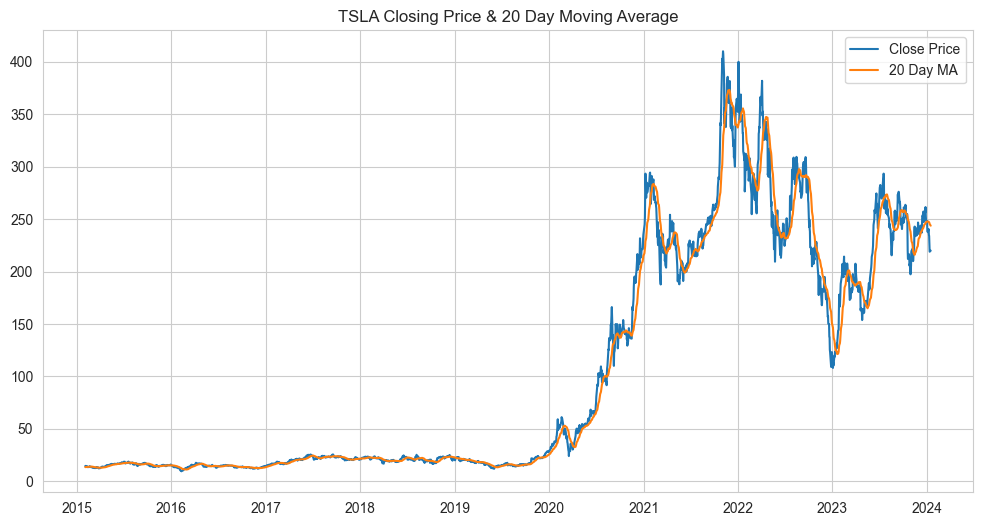

In [6]:
'''Visualize overall trend and see how MA smooths fluctuations.
Looking for:
  - Bull and bear phases
  - Periods where price diverges significantly from MA'''


plt.plot(df['Close'], label='Close Price')
plt.plot(df['ma_20'], label='20 Day MA')
plt.title('TSLA Closing Price & 20 Day Moving Average')
plt.legend()
plt.show()

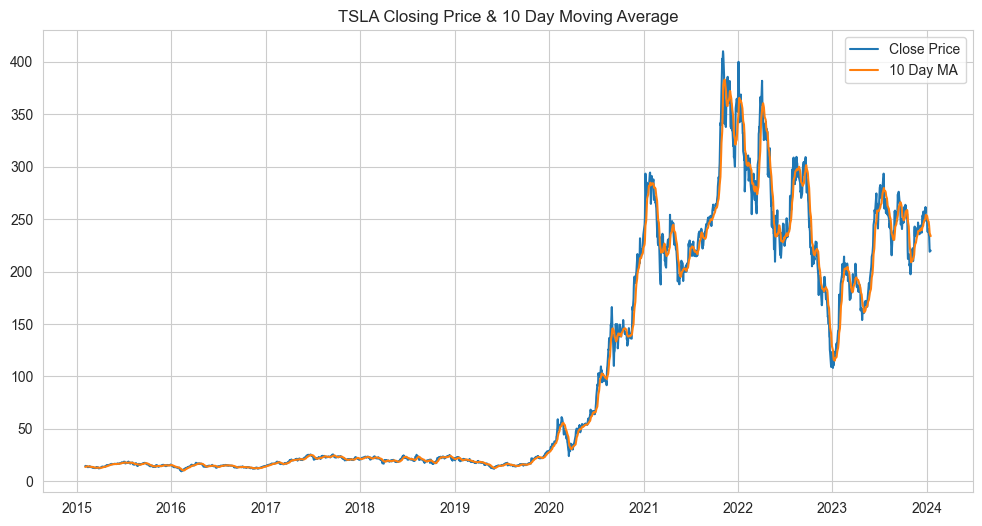

In [7]:
plt.plot(df['Close'], label='Close Price')
plt.plot(df['ma_10'], label='10 Day MA')
plt.title('TSLA Closing Price & 10 Day Moving Average')
plt.legend()
plt.show()

Returns Distribution

Financial returns are known to be non‑Gaussian (“fat tails”). Confirming whether our data exhibits this, which can inform choice of loss functions or robust models.

/home/mh13/code/Tesla-S/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


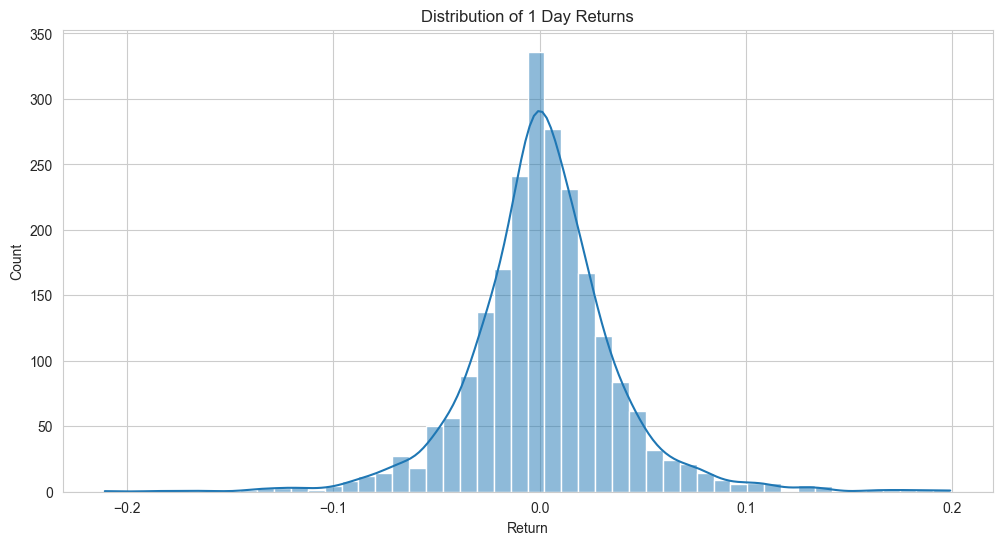

In [8]:

sns.histplot(df['return_1'], bins=50, kde=True)
plt.title('Distribution of 1 Day Returns')
plt.xlabel('Return')
plt.show()


 Volatility Over Time

 Identify periods of market stress (e.g., sudden spikes in vol) which may require special handling (e.g., regime‑switching models or volatility‑aware features).

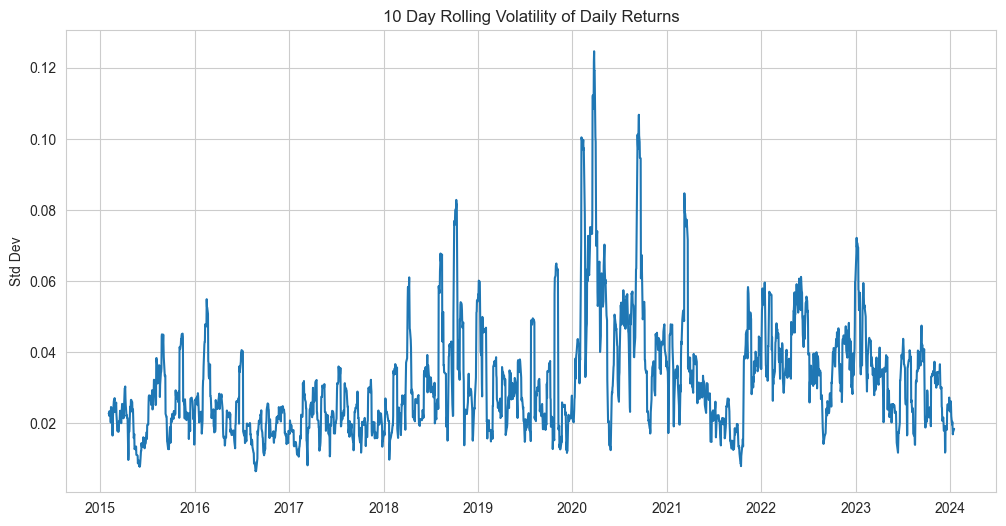

In [9]:
plt.plot(df['vol_10'])
plt.title('10 Day Rolling Volatility of Daily Returns')
plt.ylabel('Std Dev')
plt.show()

Correlation Heatmap

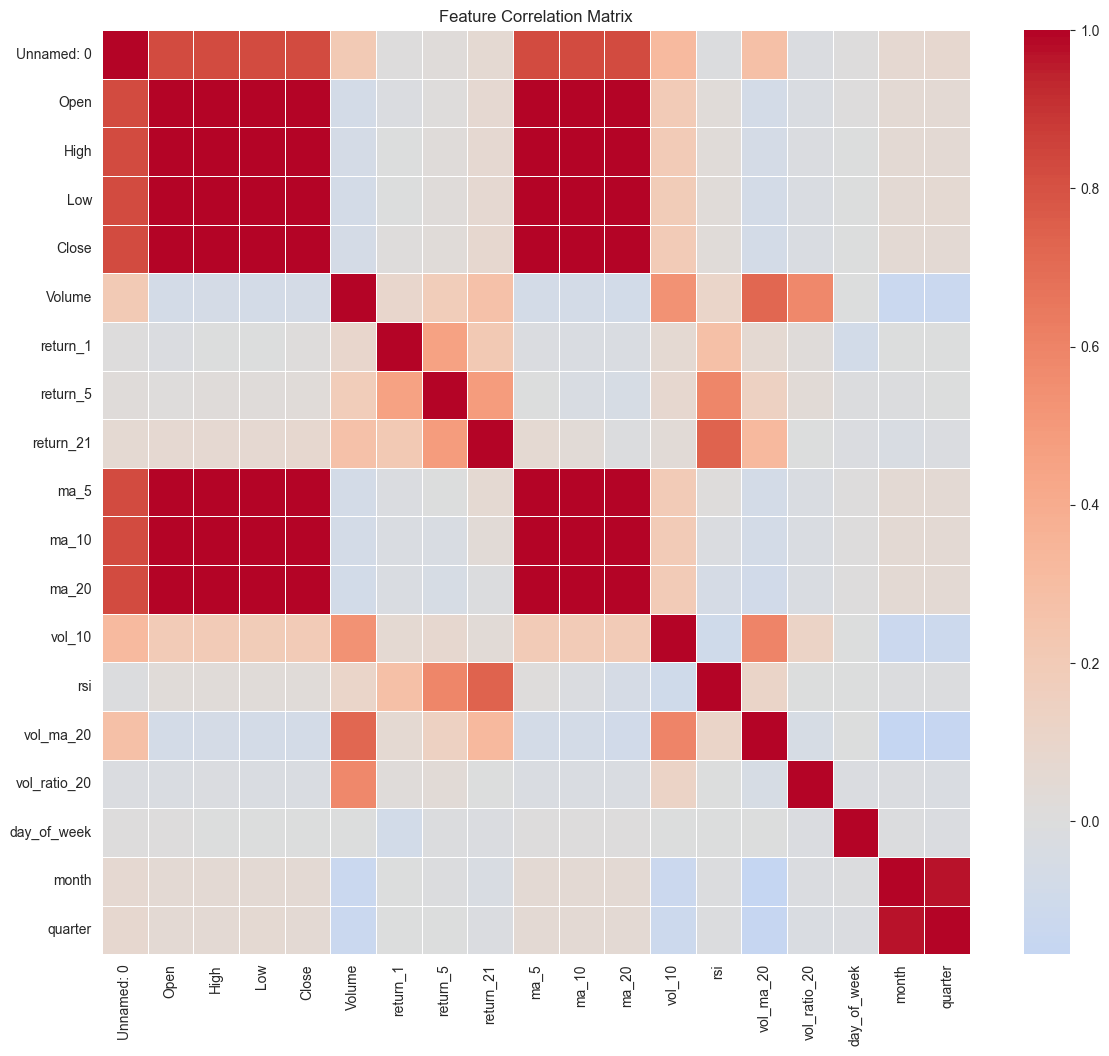

In [10]:
'''Checking multicollinearity: highly correlated predictors can inflate variance in linear models.
Identifying features that may be redundant (e.g., ma_5 and ma_10 might move together).'''

corr = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, fmt='.2f', 
            annot=False, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

Volume vs. Returns Scatter

Testing whether unusually high volume tends to precede large positive or negative returns. Patterns here could inspire new features or conditional modeling.

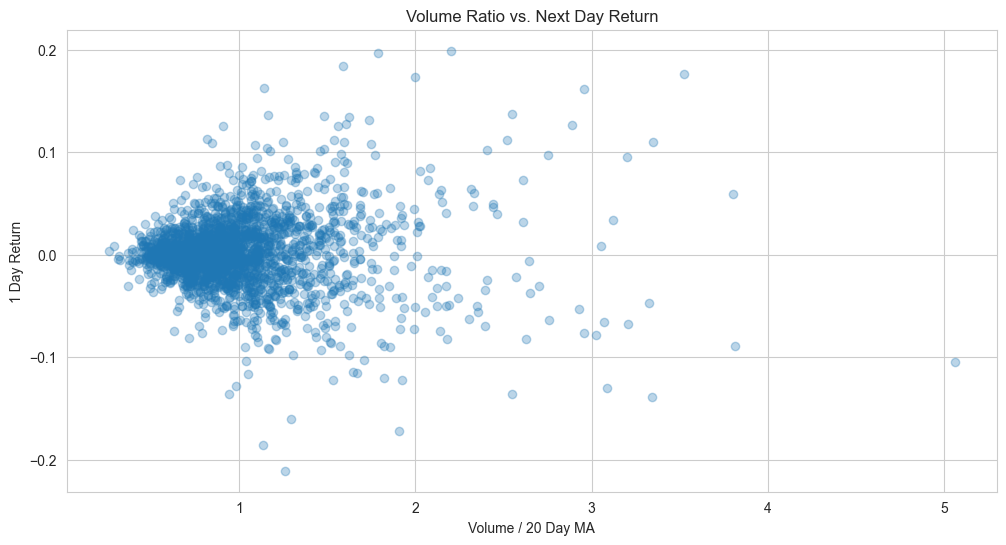

In [11]:
plt.scatter(df['vol_ratio_20'], df['return_1'], alpha=0.3)
plt.title('Volume Ratio vs. Next Day Return')
plt.xlabel('Volume / 20 Day MA')
plt.ylabel('1 Day Return')
plt.show()


Seasonal Decomposition

Even though we’re forecasting month‑ahead, it’s valuable to see if there’s a seasonal component (e.g., year‑end rallies).

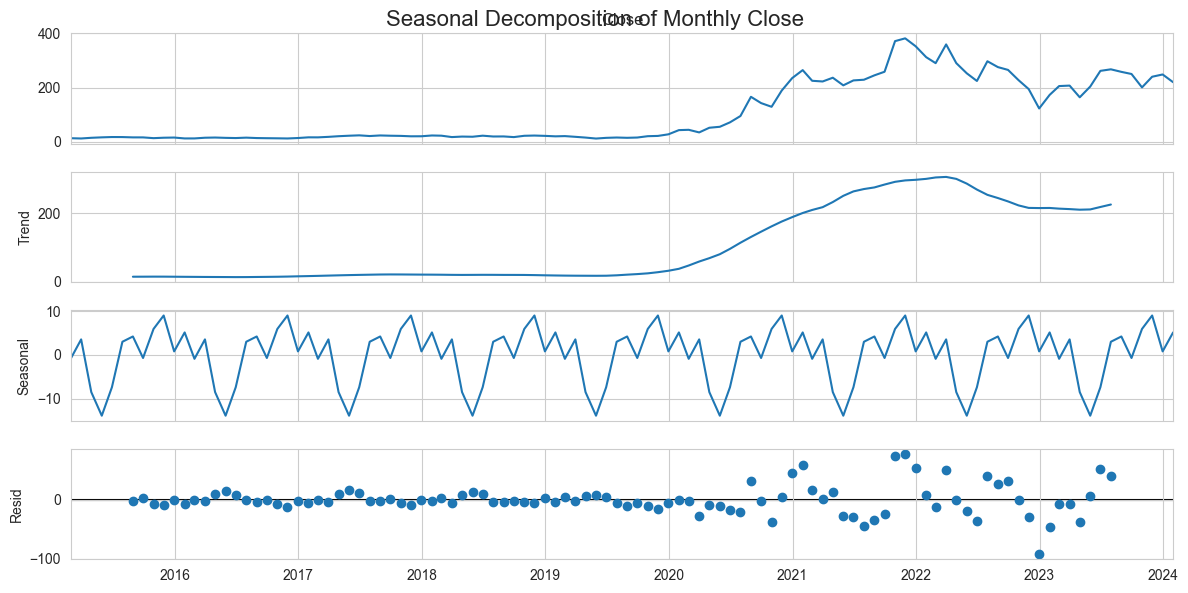

In [12]:
# Decompose monthly series to highlight trend, seasonal, residual
monthly_close = df['Close'].resample('M').last()
decomp = seasonal_decompose(monthly_close, model='additive')
decomp.plot()
plt.suptitle('Seasonal Decomposition of Monthly Close', fontsize=16)
plt.show()
